<a href="https://colab.research.google.com/github/jrcho2/Data-Science-for-COVID-19/blob/master/Cho_Discussion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect to Google Drive and set as working directory**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/MSDS 422

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


'/content/drive/My Drive'

**Import CSV file**

In [ ]:
import pandas as pd

df = pd.read_csv('Titanic_Train.csv')

**Data Exploration**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data lists 891 passengers. It looks like we have some missing datapoints in the Age attribute.

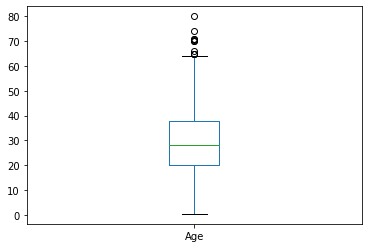

In [ ]:
df[['Age']].plot.box()

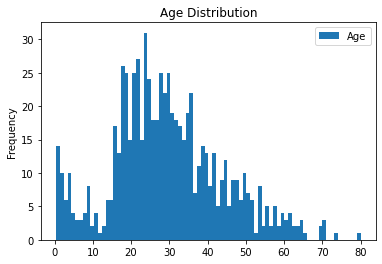

In [ ]:
df[['Age']].plot.hist(bins = 80, title = 'Age Distribution')

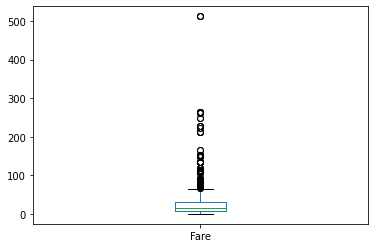

In [ ]:
df[['Fare']].plot.box()

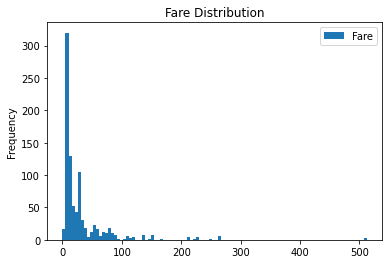

In [ ]:
df[['Fare']].plot.hist(bins = 100, title = 'Fare Distribution')

It seems as though the range of fare prices varied by quite a bit. It'd be interesting to look into the details of the outliers, particularly the extreme outliers.

In [ ]:
corr = df[['Survived','Pclass','Fare','Age']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Survived,Pclass,Fare,Age
Survived,1.00,-0.34,0.26,-0.08
Pclass,-0.34,1.00,-0.55,-0.37
Fare,0.26,-0.55,1.00,0.10
Age,-0.08,-0.37,0.10,1.00


Looking at correlation coefficients, it seems as though there's a moderate correlation between Pclass (as it decreases, the more exclusive or nicer the class) and survival (marked by a binary 0 or 1). Naturally we also see that there's a moderate correlation between fare price and Pclass as well.